# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import sympy as smp
from scipy.integrate import odeint
import plotly.graph_objects as go
from IPython.display import HTML

# Solving Lagrange's Equations

# Solve Lagranges Equation 

The gravitational potential energy inside the sphere is equal to

$$V_g = \frac{GMm}{2R^3} (r^2 - 3R^2)$$

We have to find the path that is equal to the least amount of time

$$dt = \frac{ds}{v}$$

$$\Delta t = \int_1^2 \frac{ds}{v}$$

Following variational calculus we obtain

$$ \delta \int_1^2 \frac{ds}{v} = 0$$

In [2]:
t, M, G, R, m, the, c1, c2, the0, phi = smp.symbols(r"t M G R m \theta c_1 c_2 \theta_0 \phi", real=True)
r1, r2, the1, the2, phi2 = smp.symbols(r"r_1 r_2 \theta_1 \theta_2 \phi_2", real=True)
r = smp.symbols(r"r", cls=smp.Function)
r = r(the)
# Derivatives
r_d = smp.diff(r, the)
# Second derivatives
r_dd = smp.diff(r_d, the)

In [3]:
Vg = G * M * m / (2 * R**3) * (r**2 - 3 * R**2)

In [4]:
Vg.subs({r: R})

-G*M*m/R

In [5]:
ds = smp.sqrt(r_d**2 + r**2)
v = smp.sqrt(-2*G*M*R - G*M/R * (r**2 - 3*R**2))
f = (ds / v).simplify()
f

sqrt(r(\theta)**2 + Derivative(r(\theta), \theta)**2)/sqrt(G*M*(R**2 - r(\theta)**2)/R)

In [6]:
h = r_d * smp.diff(f, r_d) - f
h

-sqrt(r(\theta)**2 + Derivative(r(\theta), \theta)**2)/sqrt(G*M*(R**2 - r(\theta)**2)/R) + Derivative(r(\theta), \theta)**2/(sqrt(G*M*(R**2 - r(\theta)**2)/R)*sqrt(r(\theta)**2 + Derivative(r(\theta), \theta)**2))

In [7]:
h.simplify()

-R*sqrt(G*M*(R**2 - r(\theta)**2)/R)*r(\theta)**2/(G*M*(R**2 - r(\theta)**2)*sqrt(r(\theta)**2 + Derivative(r(\theta), \theta)**2))

Assuming the initial velocity $\dot{r}_1$ as $0$ we can find the value of $c_1$

In [8]:
c1_eq = smp.solve(smp.Eq(h, c1).subs({r_d: 0, r: r1}), c1)[0]
c1_eq

-Abs(r_1)/sqrt(G*M*(R**2 - r_1**2)/R)

In [9]:
smp.Eq(h, Vg).subs({r_d: 0})

Eq(-sqrt(r(\theta)**2)/sqrt(G*M*(R**2 - r(\theta)**2)/R), G*M*m*(-3*R**2 + r(\theta)**2)/(2*R**3))

In [10]:
sols = smp.solve(smp.Eq(h, c1_eq), r_d, simplify=False, rotational=False)

In [11]:
sols

[-sqrt((-r(\theta) + R*sqrt(-G*M*(-R + r_1**2/R))*sqrt(-G*M*(-R + r(\theta)**2/R))*r(\theta)**2/(G*M*(R - r(\theta))*(R + r(\theta))*Abs(r_1)))*(r(\theta) + R*sqrt(-G*M*(-R + r_1**2/R))*sqrt(-G*M*(-R + r(\theta)**2/R))*r(\theta)**2/(G*M*(R - r(\theta))*(R + r(\theta))*Abs(r_1)))),
 sqrt((-r(\theta) + R*sqrt(-G*M*(-R + r_1**2/R))*sqrt(-G*M*(-R + r(\theta)**2/R))*r(\theta)**2/(G*M*(R - r(\theta))*(R + r(\theta))*Abs(r_1)))*(r(\theta) + R*sqrt(-G*M*(-R + r_1**2/R))*sqrt(-G*M*(-R + r(\theta)**2/R))*r(\theta)**2/(G*M*(R - r(\theta))*(R + r(\theta))*Abs(r_1))))]

In [12]:
sols[0] == -sols[1]

True

In [13]:
positive_sol = sols[1].simplify()
positive_sol

sqrt((-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))*Abs(R)

In [14]:
dthe = 1/positive_sol
dthe.simplify()

1/(sqrt((-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))*Abs(R))

In [15]:
u_eq = dthe * r
u_d_eq = smp.diff(u_eq, r)

In [16]:
u_eq

r(\theta)/(sqrt((-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))*Abs(R))

In [17]:
u_d_eq

r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)*(-(4*R**2*r(\theta) - 4*r(\theta)**3)*(-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(2*r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)**2) - (2*R**2*r(\theta) + 2*r_1**2*r(\theta) - 4*r(\theta)**3)*r(\theta)**2/(2*r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)) - (-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))/(sqrt((-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))*(-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)*Abs(R)) + 1/(sqrt((-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))*Abs(R))

In [18]:
u = smp.symbols("u")

In [19]:
r_subs = smp.solve(smp.Eq(u, u_eq), r)[1]
r_subs

sqrt((u**2 + 1)/(R**2*u**2 + r_1**2))*Abs(R*r_1)

In [20]:
ff = (dthe * 1/u_d_eq).subs({r: r_subs}).simplify()
ff

u**2*(-R**2 + r_1**2)/(R**2*u**4 + R**2*u**2 + r_1**2*u**2 + r_1**2)

In [21]:
smp.apart(ff, u)

r_1**2/(R**2*u**2 + r_1**2) - 1/(u**2 + 1)

In [22]:
a, b = smp.apart(ff, u).as_ordered_terms()
int_res = smp.integrate(a, u) + smp.integrate(b, u)
int_res

-atan(u) + r_1*atan(R*u/r_1)/R

In [23]:
r0 = smp.Symbol("r_0", real=True)
res = int_res.subs({u: u_eq})
the_eq = res + c2
the_with_r_eq = the_eq
the_eq

c_2 - atan(r(\theta)/(sqrt((-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))*Abs(R))) + r_1*atan(R*r(\theta)/(r_1*sqrt((-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))*Abs(R)))/R

In [24]:
atan_arg = the_eq.as_ordered_terms()[1].args[1].args[0]
atan_arg

r(\theta)/(sqrt((-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))*Abs(R))

In [25]:
smp.Eq(atan_arg, smp.tan(phi))

Eq(r(\theta)/(sqrt((-R**2*r_1**2 + R**2*r(\theta)**2 + r_1**2*r(\theta)**2 - r(\theta)**4)*r(\theta)**2/(r_1**2*(R**4 - 2*R**2*r(\theta)**2 + r(\theta)**4)))*Abs(R)), tan(\phi))

In [26]:
r_eq = smp.solve(smp.Eq(atan_arg, smp.tan(phi)), r, simplify=False)[1]
r_eq

sqrt(R**2*r_1**2*tan(\phi)**2/(R**2*tan(\phi)**2 + r_1**2) + R**2*r_1**2/(R**2*tan(\phi)**2 + r_1**2))

In [27]:
the_eq = the_eq.subs({atan_arg: smp.tan(phi)})
the_eq

c_2 - atan(tan(\phi)) + r_1*atan(R*tan(\phi)/r_1)/R

# Find $c_2$

We have $(r_1, \theta_1)$ and $(r_2, \theta_2)$ as initial and final conditions

In [28]:
smp.Eq(the1, the_eq).subs({phi: 0})

Eq(\theta_1, c_2)

In [29]:
r_eq.subs({phi: 0})

Abs(R)

# Final equations for $\theta$ and $r$

In [30]:
r_eq.simplify()

Abs(R*r_1/cos(\phi))/sqrt(R**2*tan(\phi)**2 + r_1**2)

In [31]:
the_eq = the_eq.subs({c2: the1})
the_eq

\theta_1 - atan(tan(\phi)) + r_1*atan(R*tan(\phi)/r_1)/R

# Plotting `(x, y)`

In [32]:
r_f = smp.lambdify((R, r1, phi), r_eq.simplify())

the_f = smp.lambdify((R, r1, the1, phi), the_eq)

In [33]:
phi_final = np.pi / 2
phi_steps = 1000
phi = np.linspace(0, phi_final, phi_steps)

# G = 6.674e-11
R = 1
# M = 5.972e+24
r1 = R * 0.70
the1 = np.pi / 2


# Initial Condition 1
r_phi = r_f(R, r1, phi)
the_phi = the_f(R, r1, the1, phi)

In [34]:
x_phi = r_phi * np.cos(the_phi) 
y_phi = r_phi * np.sin(the_phi)
cx = R * np.cos(np.linspace(0, 2 * np.pi, 100))
cy = R * np.sin(np.linspace(0, 2 * np.pi, 100))

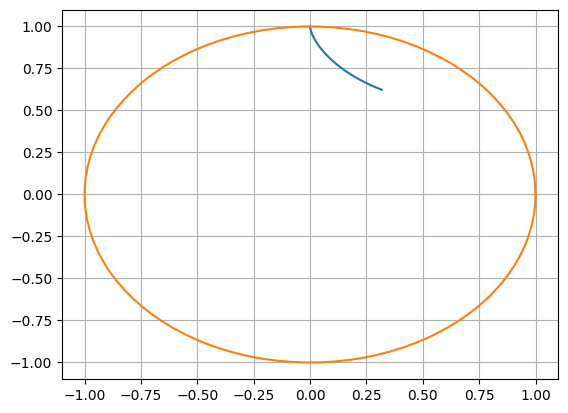

In [35]:
plt.grid()
plt.plot(x_phi, y_phi)
plt.plot(cx, cy)